In [2]:
# Libraries
import pandas as pd

# Calling functions
from src.utils import hierarchical_model as HRM

from sklearn.metrics import silhouette_score

I will use the  Min-Max Data Scaled 

In [3]:
# Load the data selected
dataset = pd.read_csv('../data/processed/data_scaled_minmax.csv')

# Dindrogram

## Optimal Linkage Matrix Method
Choose the optimal method for calculating the linkage matrix and displaying it as a dindrogram graph.

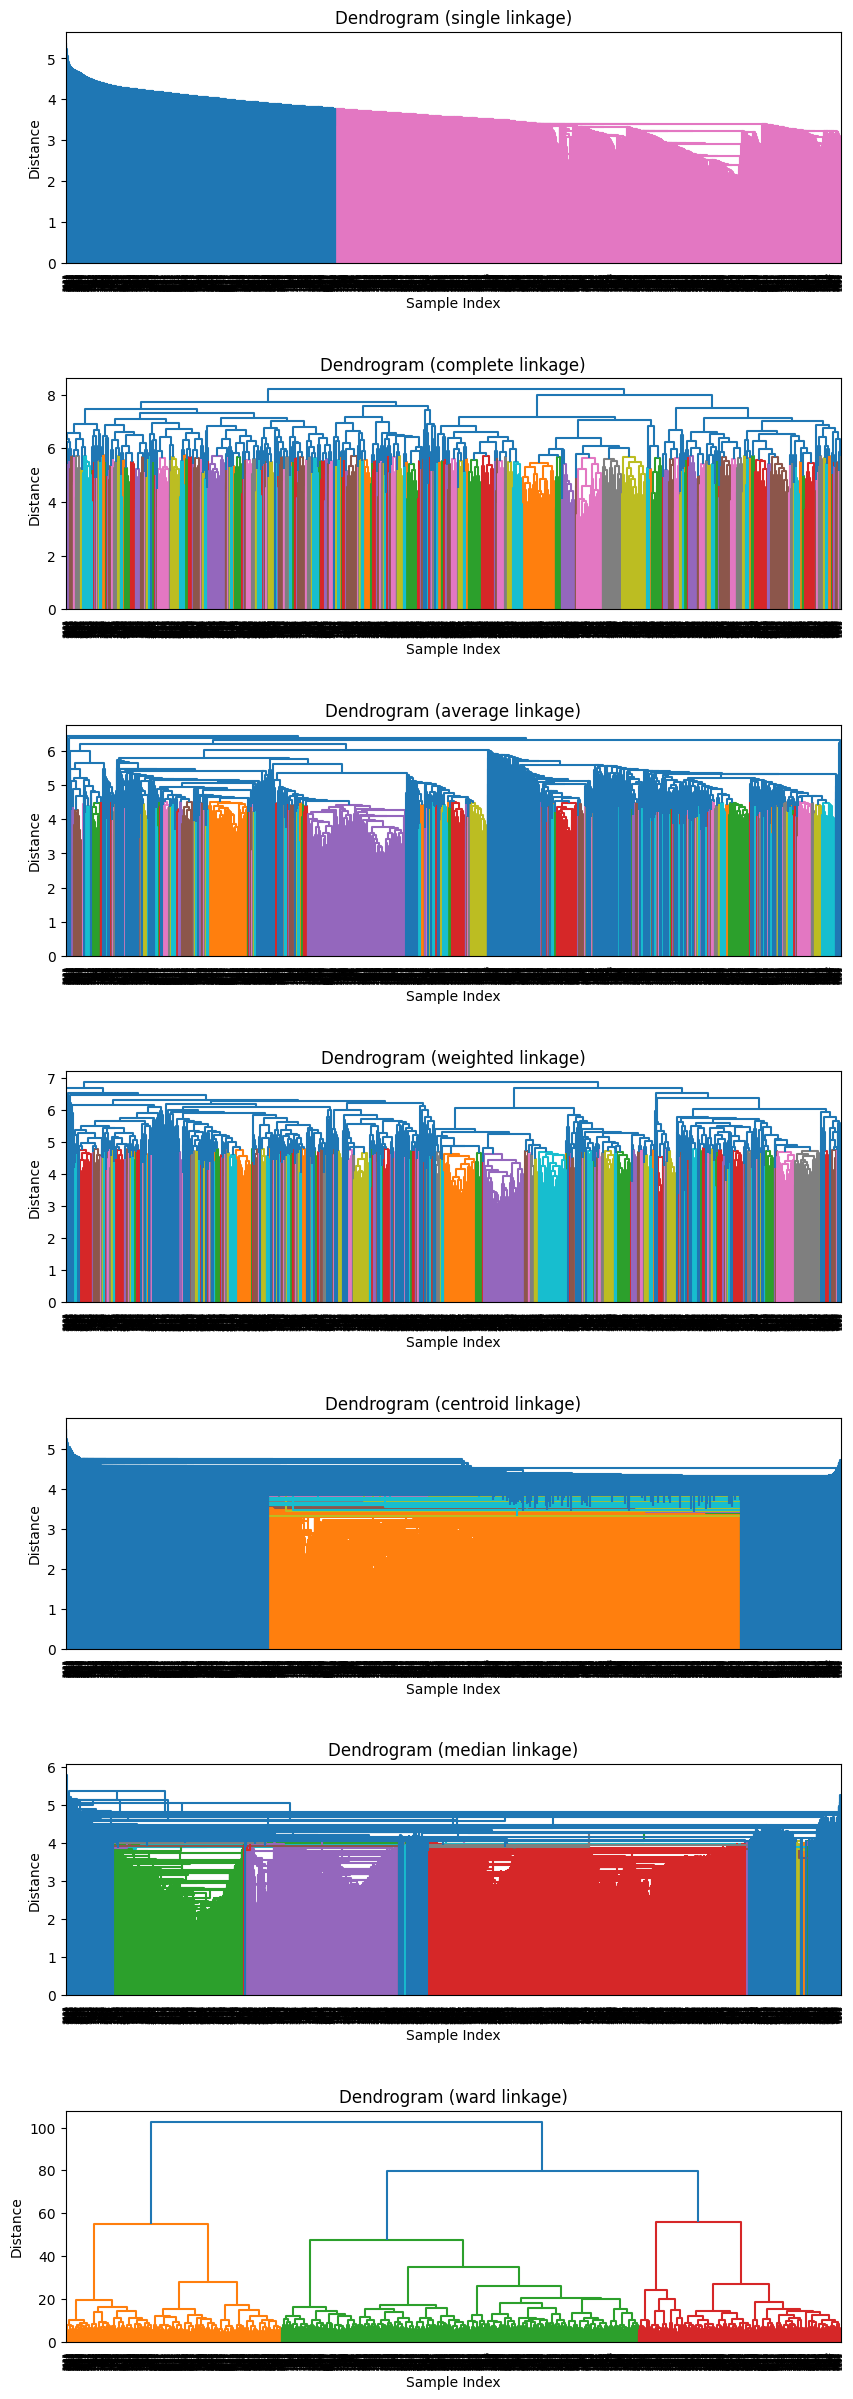

In [4]:
# Display the dendrogram graph for all linkage matrices for each metric.
HRM.plot_dendrogram_all_methods(dataset)

The *ward method* is the most appropriate dendrograms, **I will chose it since it is more readable.**

In [4]:
# Calculate the linkage matrix by the ward metric
ward_linkage = HRM.get_linkage(dataset, 'ward')

## Number of Clusters

Finding an interesting number of clusters in a dendrogram is the same as **finding the largest horizontal space that doesn't have any vertical lines** (the space with the longest vertical lines). 
***This means that there's more separation between the clusters.***

According to the previous dendrogram graph, the ideal **number of clusters** is obtained by cutting the graph **at distance 60**.

**The number of clusters can be three or four**, depending on where we will cut the longest distance.

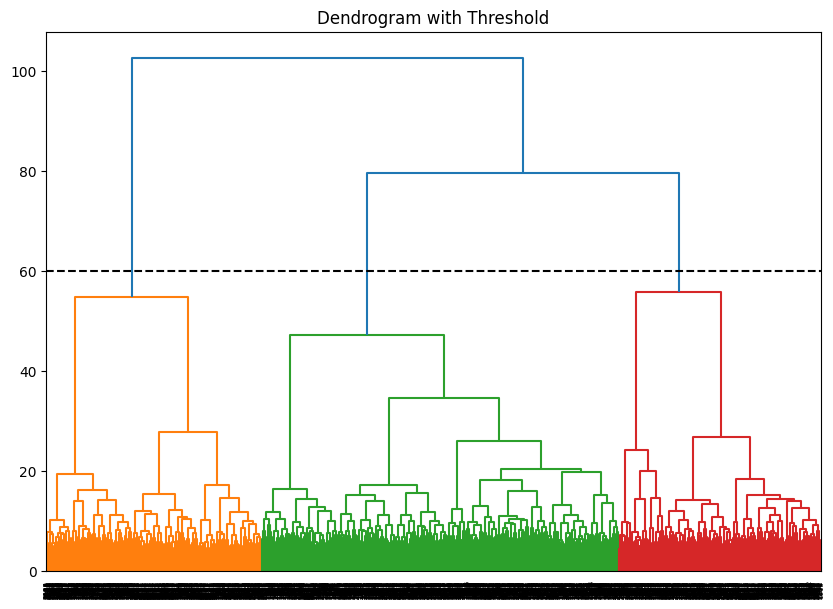

In [4]:
# Display the dendrogram with the threshould cutting at 60 
HRM.plot_thresholded_dendrogram(ward_linkage, 60)

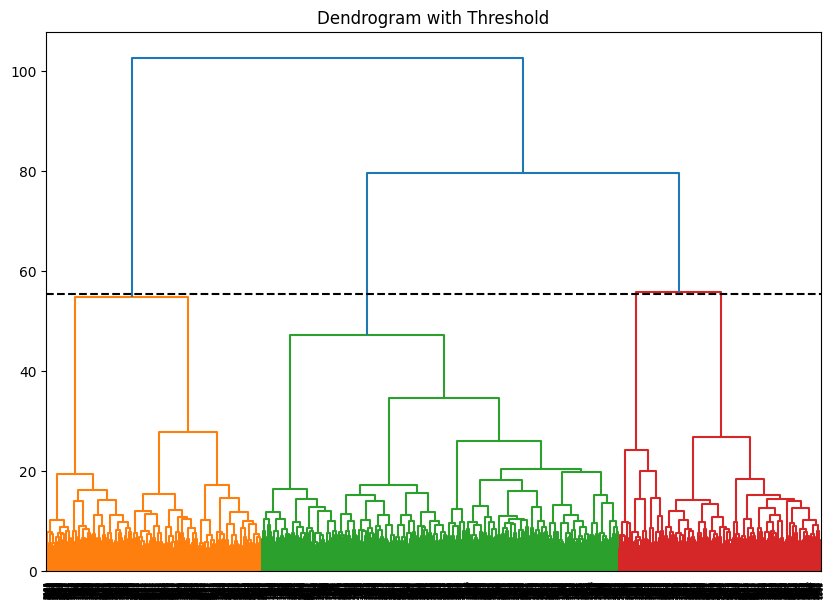

In [5]:
# Display the dendrogram with the threshould cutting at 55.5
HRM.plot_thresholded_dendrogram(ward_linkage, 55.5)

# Hierarchical Clustering

## Clustering before PCA

Store the resulting cluster labels after Perform hierarchical clustering on a dataset

In [5]:
# using 3 clusters
before_3k_labels = HRM.hierarchical_clustering(data=dataset, k=3)

# using 4 clusters
before_4k_labels = HRM.hierarchical_clustering(data=dataset, k=4)

In [6]:
print(
f'silhouette score for clustering before PCA \n with k=3 is {silhouette_score(dataset, before_3k_labels)} \n with k=4 is {silhouette_score(dataset, before_4k_labels)}')

silhouette score for clustering before PCA 
 with k=3 is 0.0910590572108311 
 with k=4 is 0.09313820658604034


We note that the silhouette score with **4 clusters on the dataset that was clustered before PCA is larger than the silhouette score with 3 clusters**.

### Plotting in 2-Dimension

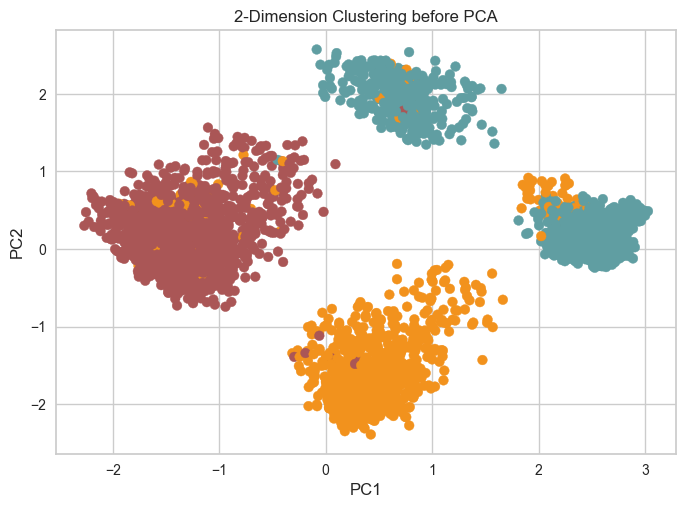

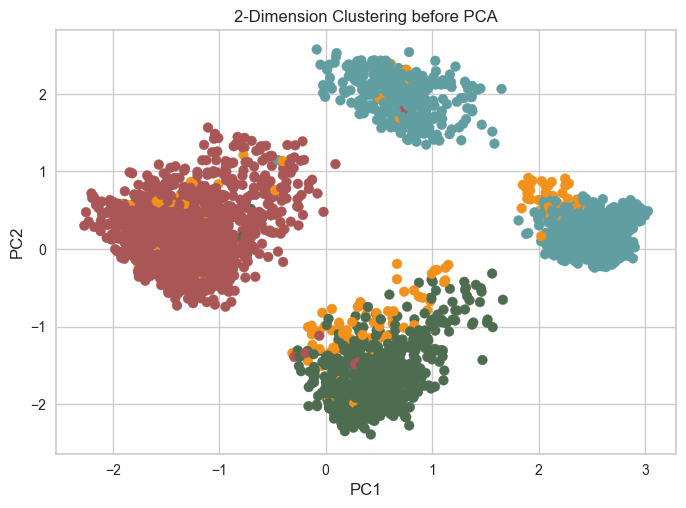

In [7]:
# Create a 2-dimension scatter plot of the data with 3 cluster labels
HRM.plot_clustering(data=dataset, labels=before_3k_labels, dimensions=2, is_before=True)

# Create a 2-dimension scatter plot of the data with 4 cluster labels
HRM.plot_clustering(data=dataset, labels=before_4k_labels, dimensions=2, is_before=True)

### Plotting in 3-Dimension

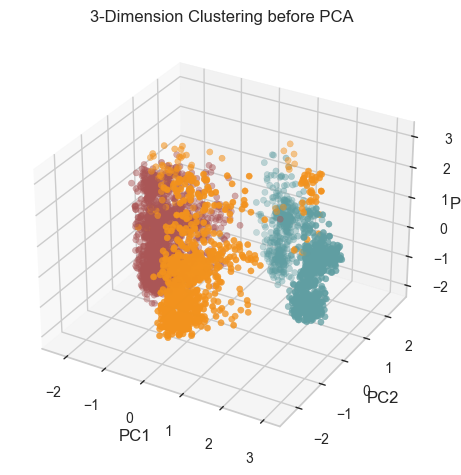

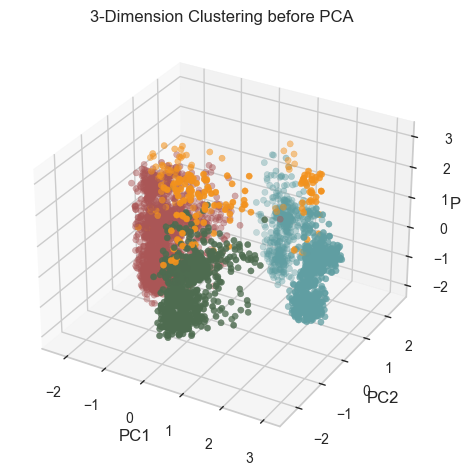

In [8]:
# Create a 3-dimension scatter plot of the data with 3 cluster labels
HRM.plot_clustering(data=dataset, labels=before_3k_labels, dimensions=3, is_before=True)

# Create a 3-dimension scatter plot of the data with 4 cluster labels
HRM.plot_clustering(data=dataset, labels=before_4k_labels, dimensions=3, is_before=True)

## Clustering after PCA

In [9]:
# Perform PCA on the dataset to reduce the dimensions to 2
transformed_2D = HRM.get_transform_PCA(data=dataset, dimensions=2)

Store the resulting cluster labels after Perform hierarchical clustering on the transformed dataset

In [11]:
# using 3 clusters
transformed_3k_labels = HRM.hierarchical_clustering(data=transformed_2D, k=3)

# using 4 clusters
transformed_4k_labels = HRM.hierarchical_clustering(data=transformed_2D, k=4)

In [12]:
print(
f'silhouette score for clustering after PCA \n with k=3 is {silhouette_score(transformed_2D, transformed_3k_labels)} \n with k=4 is {silhouette_score(transformed_2D, transformed_4k_labels)}')

silhouette score for clustering after PCA 
 with k=3 is 0.6567414376492344 
 with k=4 is 0.7387392905161


We note that the silhouette score with **4 clusters on the dataset that was clustered after PCA is larger than the silhouette score with 3 clusters**.

### Plotting in 2-Dimension

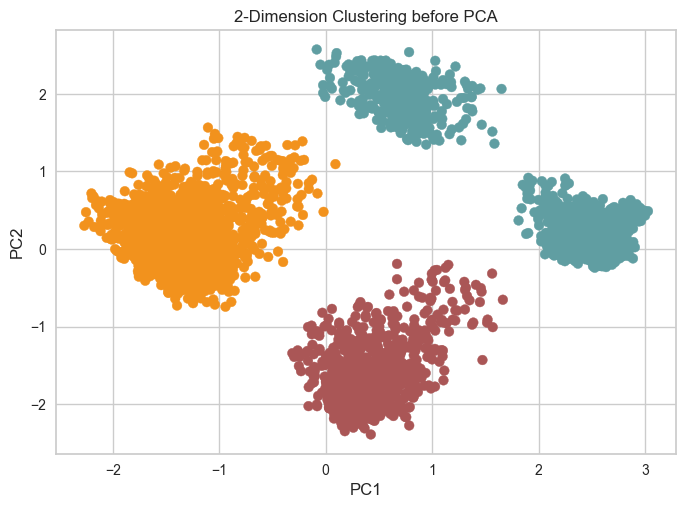

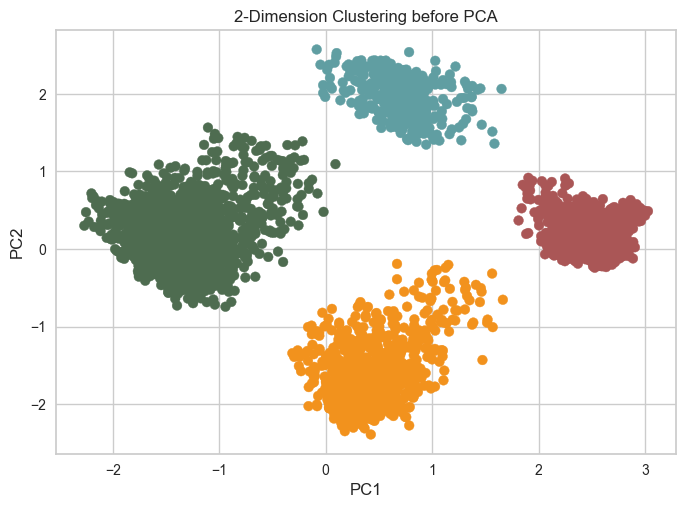

In [13]:
# Create a 2-dimension scatter plot of the transformed data with 3 cluster labels
HRM.plot_clustering(data=transformed_2D, labels=transformed_3k_labels, dimensions=2, is_before=False)

# Create a 2-dimension scatter plot of the transformed data with 4 cluster labels
HRM.plot_clustering(data=transformed_2D, labels=transformed_4k_labels, dimensions=2, is_before=False)

### Plotting in 3-Dimension

In [14]:
# Perform PCA on the dataset to reduce the dimensions to 3
transformed_3D =  HRM.get_transform_PCA(data=dataset, dimensions=3)

Store the resulting cluster labels after Perform hierarchical clustering on the transformed dataset

In [15]:
# with 3 clusters
transformed_3k_labels = HRM.hierarchical_clustering(data=transformed_3D, k=3)

# with 4 clusters
transformed_4k_labels = HRM.hierarchical_clustering(data=transformed_3D, k=4)

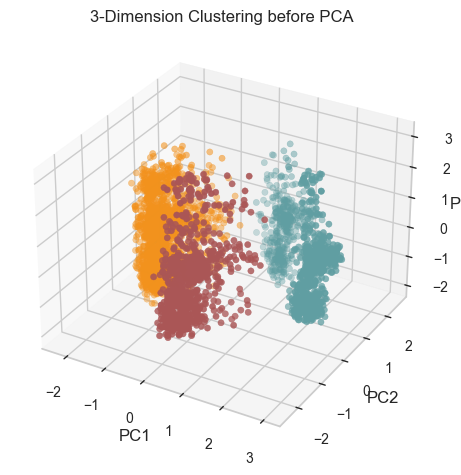

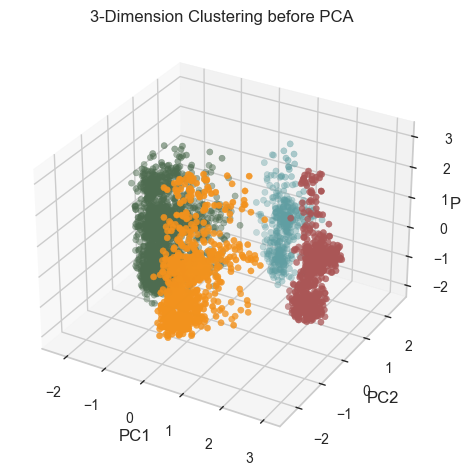

In [16]:
# Create a 3-dimension scatter plot of the transformed data with 3 cluster labels
HRM.plot_clustering(data=transformed_3D, labels=transformed_3k_labels, dimensions=3, is_before=False)

# Create a 3-dimension scatter plot of the transformed data with 4 cluster labels
HRM.plot_clustering(data=transformed_3D, labels=transformed_4k_labels, dimensions=3, is_before=False)

I suggest the hierarchical model with **four clusters after applying PCA** based on the four results.

# Save the result

I'll pick **4 as the cluster number** because *it has the highest value of all silhouette scores*. 

In [17]:
dataset['hierarchical_cluster'] = transformed_4k_labels

In [18]:
# Share data with clusters 
dataset.to_csv("../data/processed/data_scaled_minmax.csv", index=False)